<a href="https://colab.research.google.com/github/rahil1303/dmt-assignment1-2025/blob/main/notebooks/Iteration_1_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Step 1: Clone the repo
!git clone https://github.com/rahil1303/dmt-assignment1-2025.git

# Step 2: Change directory to your repo
%cd dmt-assignment1-2025

# Step 3: Install dependencies (optional)
!pip install -r requirements.txt


Cloning into 'dmt-assignment1-2025'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 44 (delta 20), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (44/44), 61.00 KiB | 369.00 KiB/s, done.
Resolving deltas: 100% (20/20), done.
/content/dmt-assignment1-2025/dmt-assignment1-2025


In [5]:
import pandas as pd
df = pd.read_excel("data/ODI-2025.xlsx")


In [6]:
# Overview of data types and missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 16 columns):
 #   Column                                                             Non-Null Count  Dtype         
---  ------                                                             --------------  -----         
 0   Tijdstempel                                                        245 non-null    datetime64[ns]
 1   What programme are you in?                                         245 non-null    object        
 2   Have you taken a course on machine learning?                       245 non-null    object        
 3   Have you taken a course on information retrieval?                  245 non-null    object        
 4   Have you taken a course on statistics?                             245 non-null    object        
 5   Have you taken a course on databases?                              245 non-null    object        
 6   What is your gender?                                              

,0
Tijdstempel,0
What programme are you in?,0
Have you taken a course on machine learning?,0
Have you taken a course on information retrieval?,0
Have you taken a course on statistics?,0
Have you taken a course on databases?,0
What is your gender?,0
I have used ChatGPT to help me with some of my study assignments,0
When is your birthday (date)?,1
How many students do you estimate there are in the room?,0


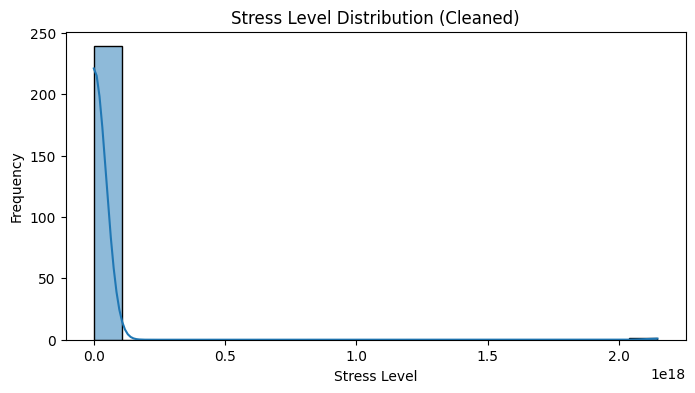

In [9]:
# Convert stress level to numeric, coercing non-numeric values to NaN
df['stress_clean'] = pd.to_numeric(df['What is your stress level (0-100)?'], errors='coerce')

# Plot the cleaned column
plt.figure(figsize=(8,4))
sns.histplot(df['stress_clean'], bins=20, kde=True)
plt.title("Stress Level Distribution (Cleaned)")
plt.xlabel("Stress Level")
plt.ylabel("Frequency")
plt.show()


In [14]:
df.columns.tolist()
# Strip all column names of leading/trailing whitespace
df.columns = df.columns.str.strip()
# Clean and convert the sports hours column to numeric
df['sports_clean'] = pd.to_numeric(df['How many hours per week do you do sports (in whole hours)?'], errors='coerce')


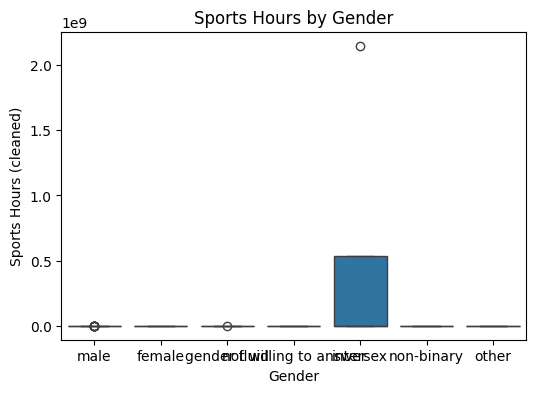

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,
            x='What is your gender?',
            y='sports_clean')
plt.title("Sports Hours by Gender")
plt.xlabel("Gender")
plt.ylabel("Sports Hours (cleaned)")
plt.show()


- Survey responses included ambiguous entries like "4-5".
- These were coerced to `NaN` to maintain numerical analysis.
- Cleaned version of the column used for visualizations.


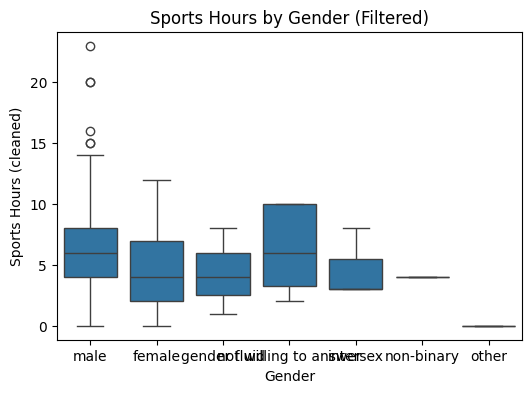

In [16]:
# Filter out extreme outliers (> 40 hours/week)
df_filtered = df[df['sports_clean'] < 40]

# Now replot
plt.figure(figsize=(6,4))
sns.boxplot(data=df_filtered,
            x='What is your gender?',
            y='sports_clean')
plt.title("Sports Hours by Gender (Filtered)")
plt.xlabel("Gender")
plt.ylabel("Sports Hours (cleaned)")
plt.show()
